In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.8/898.8 kB 16.2 MB/s eta 0:00:00


In [ ]:
# Import necessary libraries
import cv2
from ultralytics import YOLO
import time
import matplotlib.pyplot as plt
import os
from PIL import Image


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
# Set up the YOLO model
# Download the pre-trained YOLOv5s model (small and fast for testing)
model = YOLO("yolov8m.pt")  # This will automatically download the model if not presen

100%|██████████| 49.7M/49.7M [00:00<00:00, 165MB/s]


In [ ]:
# List of images to process
images = [
    "Pigs.jpg",
    "Race_Horse.jpeg",
    "Randy_Moss.jpeg",
    "Team_USA.jpeg",
    "Bayern.jpeg",
    "Byron_Buxton.jpeg"
]

# Initialize a list to store results for all images
detection_results = []

import time  # Import the time module to measure detection time
# Process each image
for img_name in images:
    start_time = time.time()
    results = model.predict(img_name)
    end_time = time.time()

    result = results[0]
    detection_time = end_time - start_time  # Calculate detection time

    # Save and annotate the image
    annotated_image = result.plot()
    annotated_image_pil = Image.fromarray(annotated_image)
    annotated_image_pil.save(f"detected_objects_{img_name}")

    # Extract details for each detected object
    objects_detected = []
    object_names = []  # Collect names of detected objects with confidence scores
    confidence_scores = []  # Store confidence scores for average calculation
    for box in result.boxes:
        class_id = result.names[box.cls[0].item()]  # Object class name
        cords = box.xyxy[0].tolist()  # Bounding box coordinates
        cords = [round(x) for x in cords]
        conf = round(box.conf[0].item(), 2)  # Confidence score as a percentage
        object_names.append(f"{class_id} ({conf * 100}%)")  # Add object name with confidence
        confidence_scores.append(conf)  # Store the confidence score

    # Calculate the average confidence score for the image
    average_confidence = (
        sum(confidence_scores) / len(confidence_scores) if confidence_scores else 0
    )

    # Add the results to the detection_results list
    detection_results.append({
        "Image": img_name,
        "Total Objects Detected": len(result.boxes),
        "Detection Time (s)": round(detection_time, 2),
        "Average Confidence (%)": round(average_confidence * 100, 2),
        "Detected Objects": ", ".join(object_names),  # Join object names into a string
    })





image 1/1 /content/Pigs.jpg: 448x640 5 cows, 1995.4ms
Speed: 18.0ms preprocess, 1995.4ms inference, 34.8ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /content/Race_Horse.jpeg: 288x640 3 persons, 4 horses, 741.5ms
Speed: 2.6ms preprocess, 741.5ms inference, 1.4ms postprocess per image at shape (1, 3, 288, 640)

image 1/1 /content/Randy_Moss.jpeg: 480x640 6 persons, 1 sports ball, 1171.3ms
Speed: 4.5ms preprocess, 1171.3ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/Team_USA.jpeg: 448x640 9 persons, 1 sports ball, 1058.1ms
Speed: 3.7ms preprocess, 1058.1ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /content/Bayern.jpeg: 448x640 12 persons, 1107.3ms
Speed: 4.4ms preprocess, 1107.3ms inference, 1.8ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /content/Byron_Buxton.jpeg: 608x640 1 person, 1 baseball bat, 1496.7ms
Speed: 5.6ms preprocess, 1496.7ms inference, 1.4ms postprocess per image 

In [ ]:
import pandas as pd


# Create a DataFrame summarizing the results
summary_data = []
for result in detection_results:
    summary_data.append({
        "Image": result["Image"],
        "Total Objects Detected": result["Total Objects Detected"],
        "Detection Time (s)": round(result["Detection Time (s)"], 2),
        "Average Confidence (%)": result["Average Confidence (%)"],  # Add the average confidence score
        "Detected Objects": result["Detected Objects"]  # Include the detected objects
    })

summary_df = pd.DataFrame(summary_data)
print(summary_df)

# Save the summary to a CSV file
summary_df.to_csv("detection_summary_with_probabilities.csv", index=False)

               Image  Total Objects Detected  Detection Time (s)  \
0           Pigs.jpg                       5                7.06   
1    Race_Horse.jpeg                       7                0.75   
2    Randy_Moss.jpeg                       7                1.19   
3      Team_USA.jpeg                      10                1.14   
4        Bayern.jpeg                      12                1.49   
5  Byron_Buxton.jpeg                       2                1.51   

   Average Confidence (%)                                   Detected Objects  
0                   61.20  cow (90.0%), cow (75.0%), cow (64.0%), cow (39...  
1                   70.57  horse (93.0%), horse (91.0%), person (86.0%), ...  
2                   70.00  person (93.0%), person (92.0%), person (82.0%)...  
3                   77.10  person (91.0%), person (91.0%), person (87.0%)...  
4                   73.83  person (89.0%), person (89.0%), person (84.0%)...  
5                   93.50               person (9

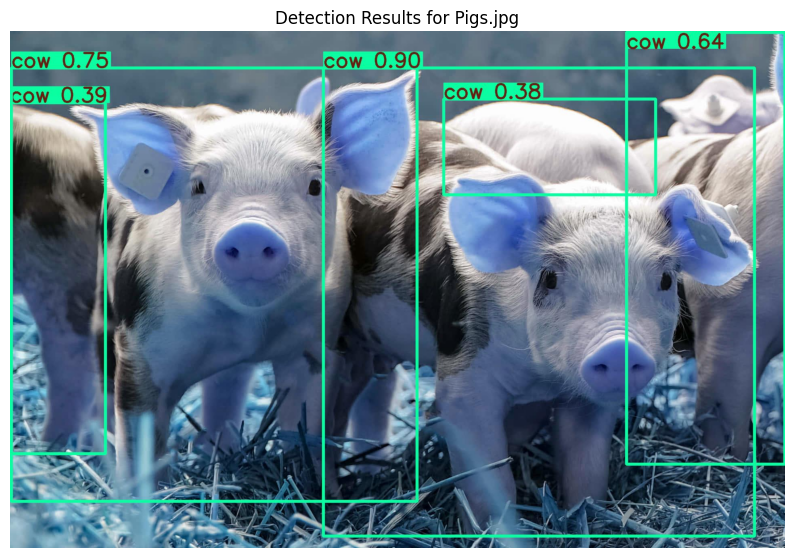

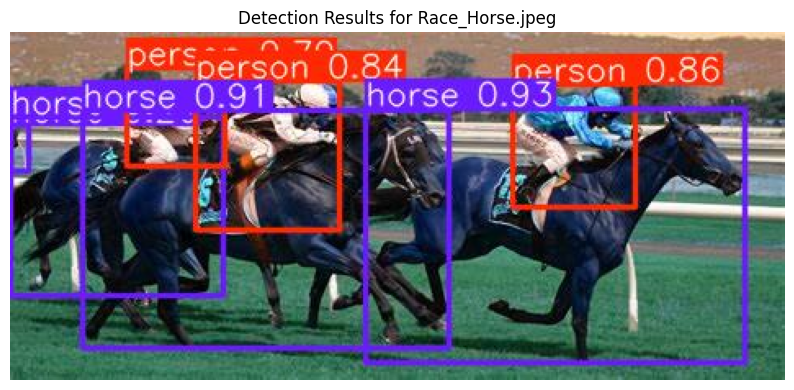

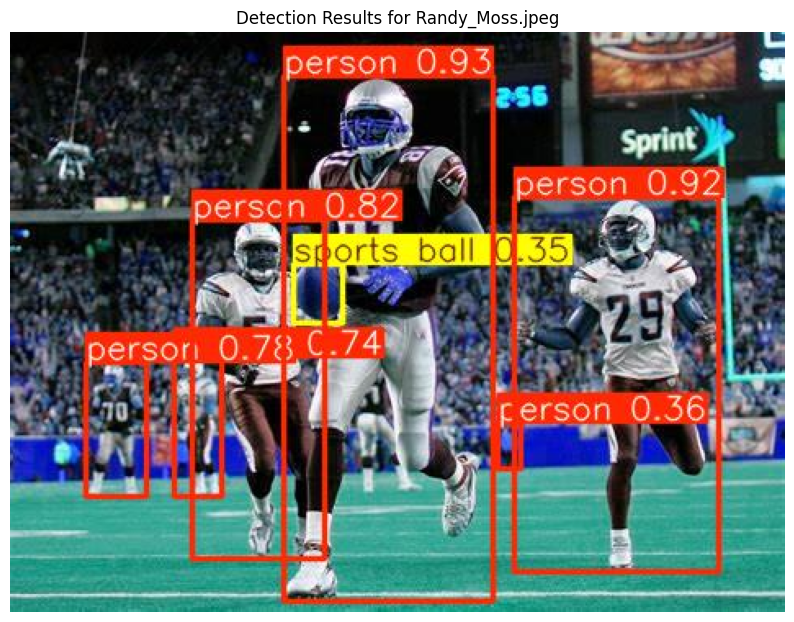

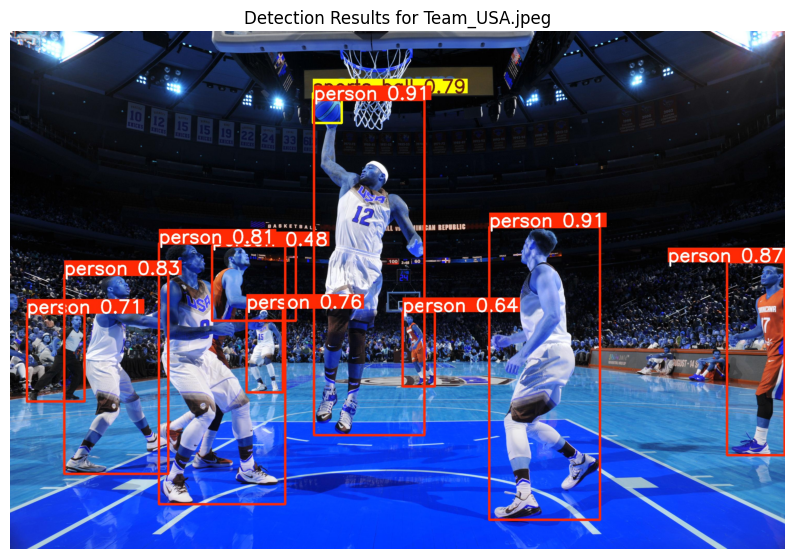

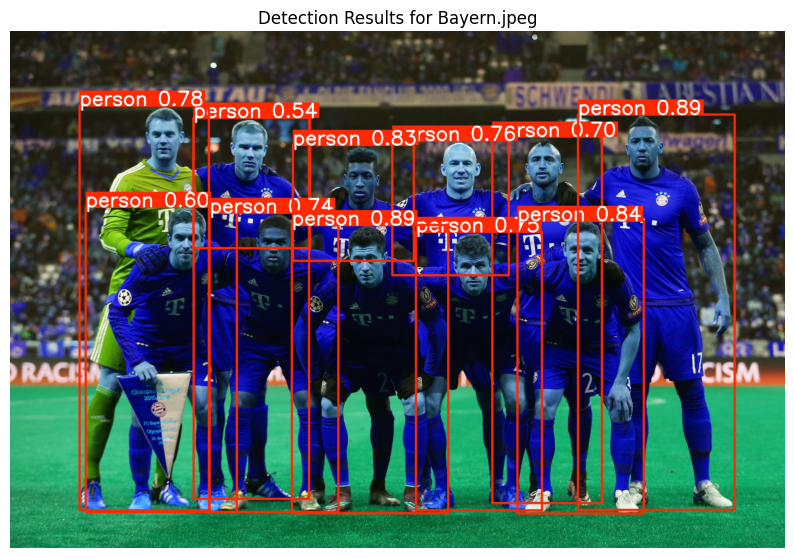

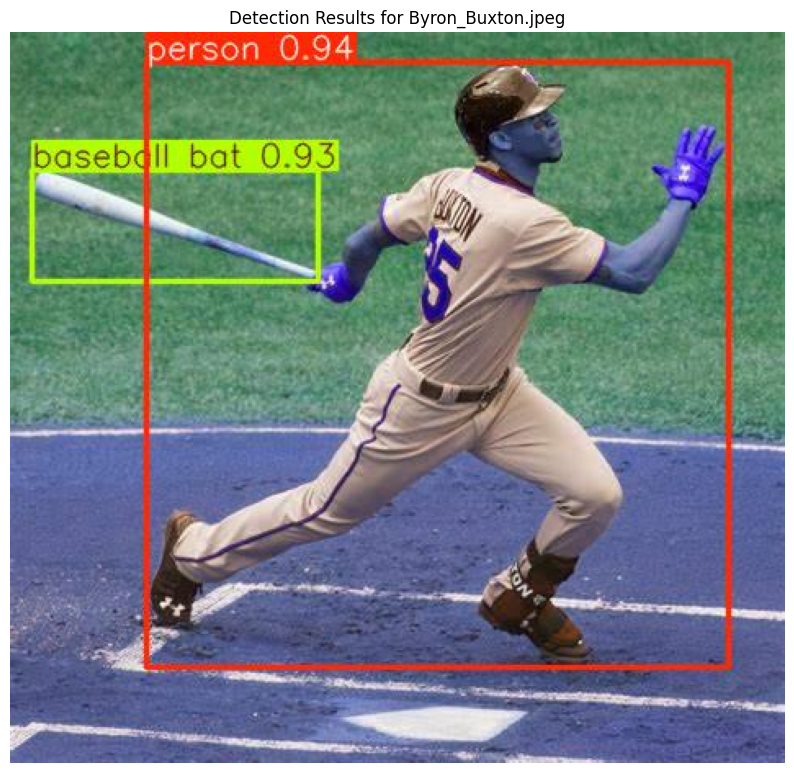

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

# Loop through the images and display the saved annotated versions
for img_name in images:
    annotated_img_path = f"detected_objects_{img_name}"  # Path to the saved annotated image
    annotated_image = Image.open(annotated_img_path)  # Open the image

    # Display the annotated image in the notebook
    plt.figure(figsize=(10, 10))  # Set the figure size
    plt.imshow(annotated_image)
    plt.axis('off')  # Turn off the axes for better visualization
    plt.title(f"Detection Results for {img_name}")  # Add a title
    plt.show()
